In [118]:
import numpy as np 
import matplotlib.pyplot as plt

In [119]:
%load_ext autoreload
%autoreload 2
import gmpes

ModuleNotFoundError: No module named 'gmpes'

In [ ]:
dists = np.linspace(1,400, 200)
mw = 4.3

# Evaluate the GMPE for each distance
y1,y2,y3,y4,y5 = gmpes.eval_gmpe(mw, dists, author='RE19', model_type='PGA', debug=True)
results_akker = gmpes.eval_gmpe(4.5, dists, author='AK14', model_type='PGA')


In [ ]:
y1

2.5600409999999996

NameError: name 'dists' is not defined

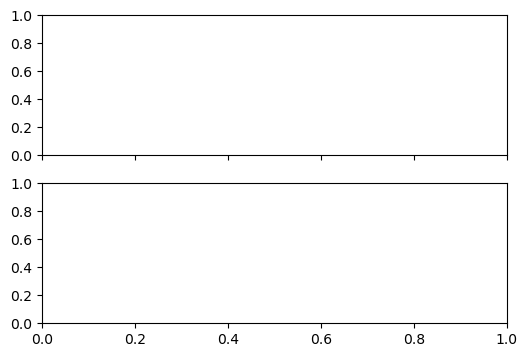

In [120]:
fig,  axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True) 
ax = axs[0]
ax.semilogy(dists, results)
ax.set_yscale("log", base=10)
# ax.set_ylim([1e-5, 1e0])
ax.set_xlim([0, 400])
# ax.set_xlabel('Distance (km)')
ax.set_ylabel('PGA (g)')

ax1 = axs[1]
ax1.semilogy(dists, results_akker)
ax1.set_yscale("log", base=10)
ax.set_xlim([0, 400])
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('PGA (g)')
plt.tight_layout()
plt.show()

In [121]:
from gmpes import _re19_f_terms

ModuleNotFoundError: No module named 'gmpes'

In [122]:
dists = np.linspace(1,400,200)
f0, f1, f2 = _re19_f_terms(dists)
fig, ax = plt.subplots(1,1, figsize=(6,8))
ax.plot(dists, f0, label='f0')
ax.plot(dists, f1, label='f1')
ax.plot(dists, f2, label='f2')
ax.legend()
ax.set_xlabel('Distance (km)')
ax.set_ylabel('RE 19 f terms')
plt.show()


NameError: name '_re19_f_terms' is not defined

In [123]:
np.power(10, [1,2,3])

array([  10,  100, 1000])

Akkar PGV

In [124]:
results_akker = gmpes.eval_gmpe(1, dists, author='AK14', model_type='PGV')


NameError: name 'gmpes' is not defined

NameError: name 'results_akker' is not defined

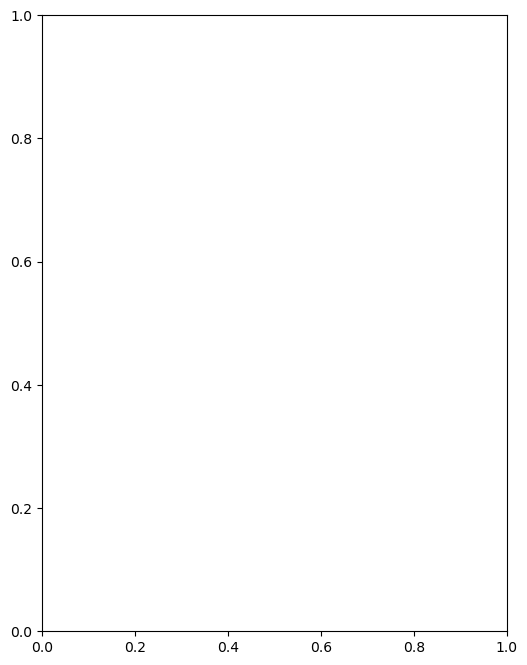

In [125]:
fig, ax = plt.subplots(1,1, figsize=(6,8))
ax.loglog(dists, results_akker)

### Test SNCAST GMPE model

In [126]:
import obspy
from obspy.clients.fdsn import Client
import pygmt

In [127]:
eida = Client('http://eida.bgs.ac.uk')
start = obspy.UTCDateTime(2025,3,13,0,0,0)
current_uk_inv = eida.get_stations(network='*',
                                         channel='HH?',
                                         station='*',
                                         starttime=start,
                                         level='channel')

In [128]:
from noise_estimation import make_noise_estimate_for_ppsds

ModuleNotFoundError: No module named 'noise_estimation'

In [ ]:
uk_core_noise = make_noise_estimate_for_ppsds(current_uk_inv.select(network='GB'),
                                              case='worst',
                                              kind='vel')


GB_HEX_HHZ_20230101_20240101_PPSD.npz
GB_WPS_HHZ_20230101_20240101_PPSD.npz
GB_LRW_HHZ_20230101_20240101_PPSD.npz
GB_WLF1_HHZ_20230101_20240101_PPSD.npz
GB_OLDB_HHZ_20230101_20240101_PPSD.npz
GB_TARL_HHZ_20230101_20240101_PPSD.npz
GB_STNC_HHZ_20230101_20240101_PPSD.npz
GB_AP12_HHZ_20230101_20240101_PPSD.npz
GB_AR07_HHZ_20230101_20240101_PPSD.npz
GB_AQ12_HHZ_20230101_20240101_PPSD.npz


In [ ]:
uk_core_noise.sort_values(by='noise [cm/s]')

longitude  latitude  elevation_km  noise [cm/s] station
12   -4.04383  56.42733         0.279  6.422861e-08    INVG
49   -3.19983  52.88950         0.447  2.952763e-07    FOEL
48   -3.91017  58.49317         0.070  2.952763e-07    BIGH
38   -3.20517  55.31650         0.261  3.038985e-07     ESK
31   -5.39900  56.26000         0.137  3.409797e-07    LAWE
46   -4.71133  54.86633         0.117  3.717308e-07    GAL1
35   -4.33733  56.18867         0.279  3.937572e-07     EAB
2    -2.88067  52.51833         0.429  4.052552e-07    HLM1
9    -3.10483  54.58867         0.281  4.170888e-07    KESW
23   -4.48483  50.99434         0.086  4.547038e-07     HTL
33   -2.99833  51.99733         0.219  4.816467e-07    MCH1
30   -4.56617  54.26050         0.188  4.957110e-07    IOMK
25   -5.19700  58.14700         0.058  4.957110e-07    LINV
8    -5.65267  57.33917         0.013  5.891536e-07     KPL
50   -6.11050  55.08283         0.239  6.610412e-07    CLGH
20   -5.22767  50.18667         0.210  6.803440e-07    CCA1
37   -3.25417  57.58283         0.293  7.417005e-07     MCD
26   -3.93100  50.43533         0.292  7.417005e-07     DYA
54   -0.66133  54.12383         0.181  9.337456e-07    AU08
40   -1.96217  54.83117         0.000  1.109759e-06    EDMD
5    -1.30767  52.73850         0.203  1.175516e-06     CWF
13   -2.17167  49.18783         0.039  1.245170e-06     JSA
36   -2.80417  51.83916         0.145  1.437900e-06    MONM
28    0.98950  52.09333         0.074  1.437900e-06    ELMS
32   -4.48367  55.81150         0.199  1.613350e-06    PGB1
45   -4.23000  55.11733         0.151  1.708947e-06    NEWG
41    0.62833  52.72433         0.062  1.863067e-06    WACR
0    -1.62417  53.95817         0.233  2.151437e-06     HPK
3    -1.72467  53.40150         0.353  2.484440e-06    LBWR
43    1.13483  51.14817         0.129  2.484440e-06    ELSH
42   -4.74483  51.95284         0.278  2.631653e-06    RSBS
56   -0.81567  54.42183         0.228  2.868987e-06    GDLE
4    -1.93817  54.25333         0.411  3.313054e-06    CTON
21   -2.16250  51.77583         0.200  3.409797e-06    STRD
19   -4.55950  57.10100         0.663  3.409797e-06    GVIE
55   -3.18750  55.92333         0.125  3.509365e-06     EDI
39   -1.80033  51.51317         0.192  3.611840e-06    SWN1
11   -1.83183  54.55250         0.156  3.825855e-06    WINS
10   -3.59750  56.81950         0.390  3.825855e-06    PITL
16   -2.61417  55.91750         0.337  3.937572e-06     ESY
17   -2.48650  56.91267         0.208  4.170888e-06    DRUM
29   -6.96583  62.06850         0.000  5.404164e-06    SOFL
27   -0.80967  51.72183         0.212  6.063572e-06     SKP
14    0.33633  50.86733         0.026  9.337456e-06    HMNX
1     1.25917  52.25033         0.054  1.175516e-05    BEDF
6    -0.26500  51.18800         0.081  1.318951e-05    BRDL
24   -0.32600  53.45683         0.146  1.523100e-05     LMK
53   -2.75183  54.43683         0.389  2.000000e-05    AQ12
52   -2.45867  53.99600         0.233  2.000000e-05    AR07
51   -3.26683  54.31000         0.220  2.000000e-05    AP12
7    -3.80267  51.06633         0.230  2.000000e-05     HEX
47   -2.20617  53.09133         0.234  2.000000e-05    STNC
18   -1.17783  60.13600         0.098  2.000000e-05     LRW
22   -4.39667  53.28933         0.058  2.000000e-05    WLF1
15   -4.49867  53.40050         0.025  2.000000e-05     WPS
34   -2.55017  51.66050         0.006  2.000000e-05    OLDB
44   -2.87250  57.16083         0.320  2.000000e-05    TARL

In [ ]:
from detcap_model import minML

In [ ]:
akker_test = minML(uk_core_noise, stat_num=5,
                   foc_depth=2,
                   lon0=-2, lon1=3,
                   lat0=53, lat1=56,
                   dlat=0.1, dlon=0.1,
                   region='UK', method='GMPE',
                   gmpe='AK14', gmpe_model_type='PGV',
                   mag_delta=0.1, mag_min=0)

0, HPK, 2.1514365892681362e-06
1, BEDF, 1.1755160152998004e-05
2, HLM1, 4.05255157246997e-07
3, LBWR, 2.484440214488577e-06
4, CTON, 3.313054272948963e-06
5, CWF, 1.1755160152998003e-06
6, BRDL, 1.3189506624938873e-05
5.350922478497557e-05 1.3189506624938873e-05 3
7, HEX, 2e-05
5.0799041123595746e-05 2e-05 3
8, KPL, 5.891536197926615e-07
9, KESW, 4.1708882148687046e-07
10, PITL, 3.825855388699894e-06
11, WINS, 3.825855388699894e-06
12, INVG, 6.422861399305239e-08
13, JSA, 1.2451697182118775e-06
14, HMNX, 9.337455613232127e-06
4.5711664306865135e-05 9.337455613232127e-06 3
15, WPS, 2e-05
16, ESY, 3.9375723830195754e-06
17, DRUM, 4.170888214868703e-06
18, LRW, 2e-05
7.5283726089625e-05 2e-05 3
19, GVIE, 3.409797204342827e-06
20, CCA1, 6.803439863511482e-07
21, STRD, 3.409797204342827e-06
22, WLF1, 2e-05
23, HTL, 4.547037651321746e-07
24, LMK, 1.523100463742167e-05
25, LINV, 4.957109933762256e-07
26, DYA, 7.417004634075015e-07
27, SKP, 6.063572160891131e-06
28, ELMS, 1.4378995584719252e-0

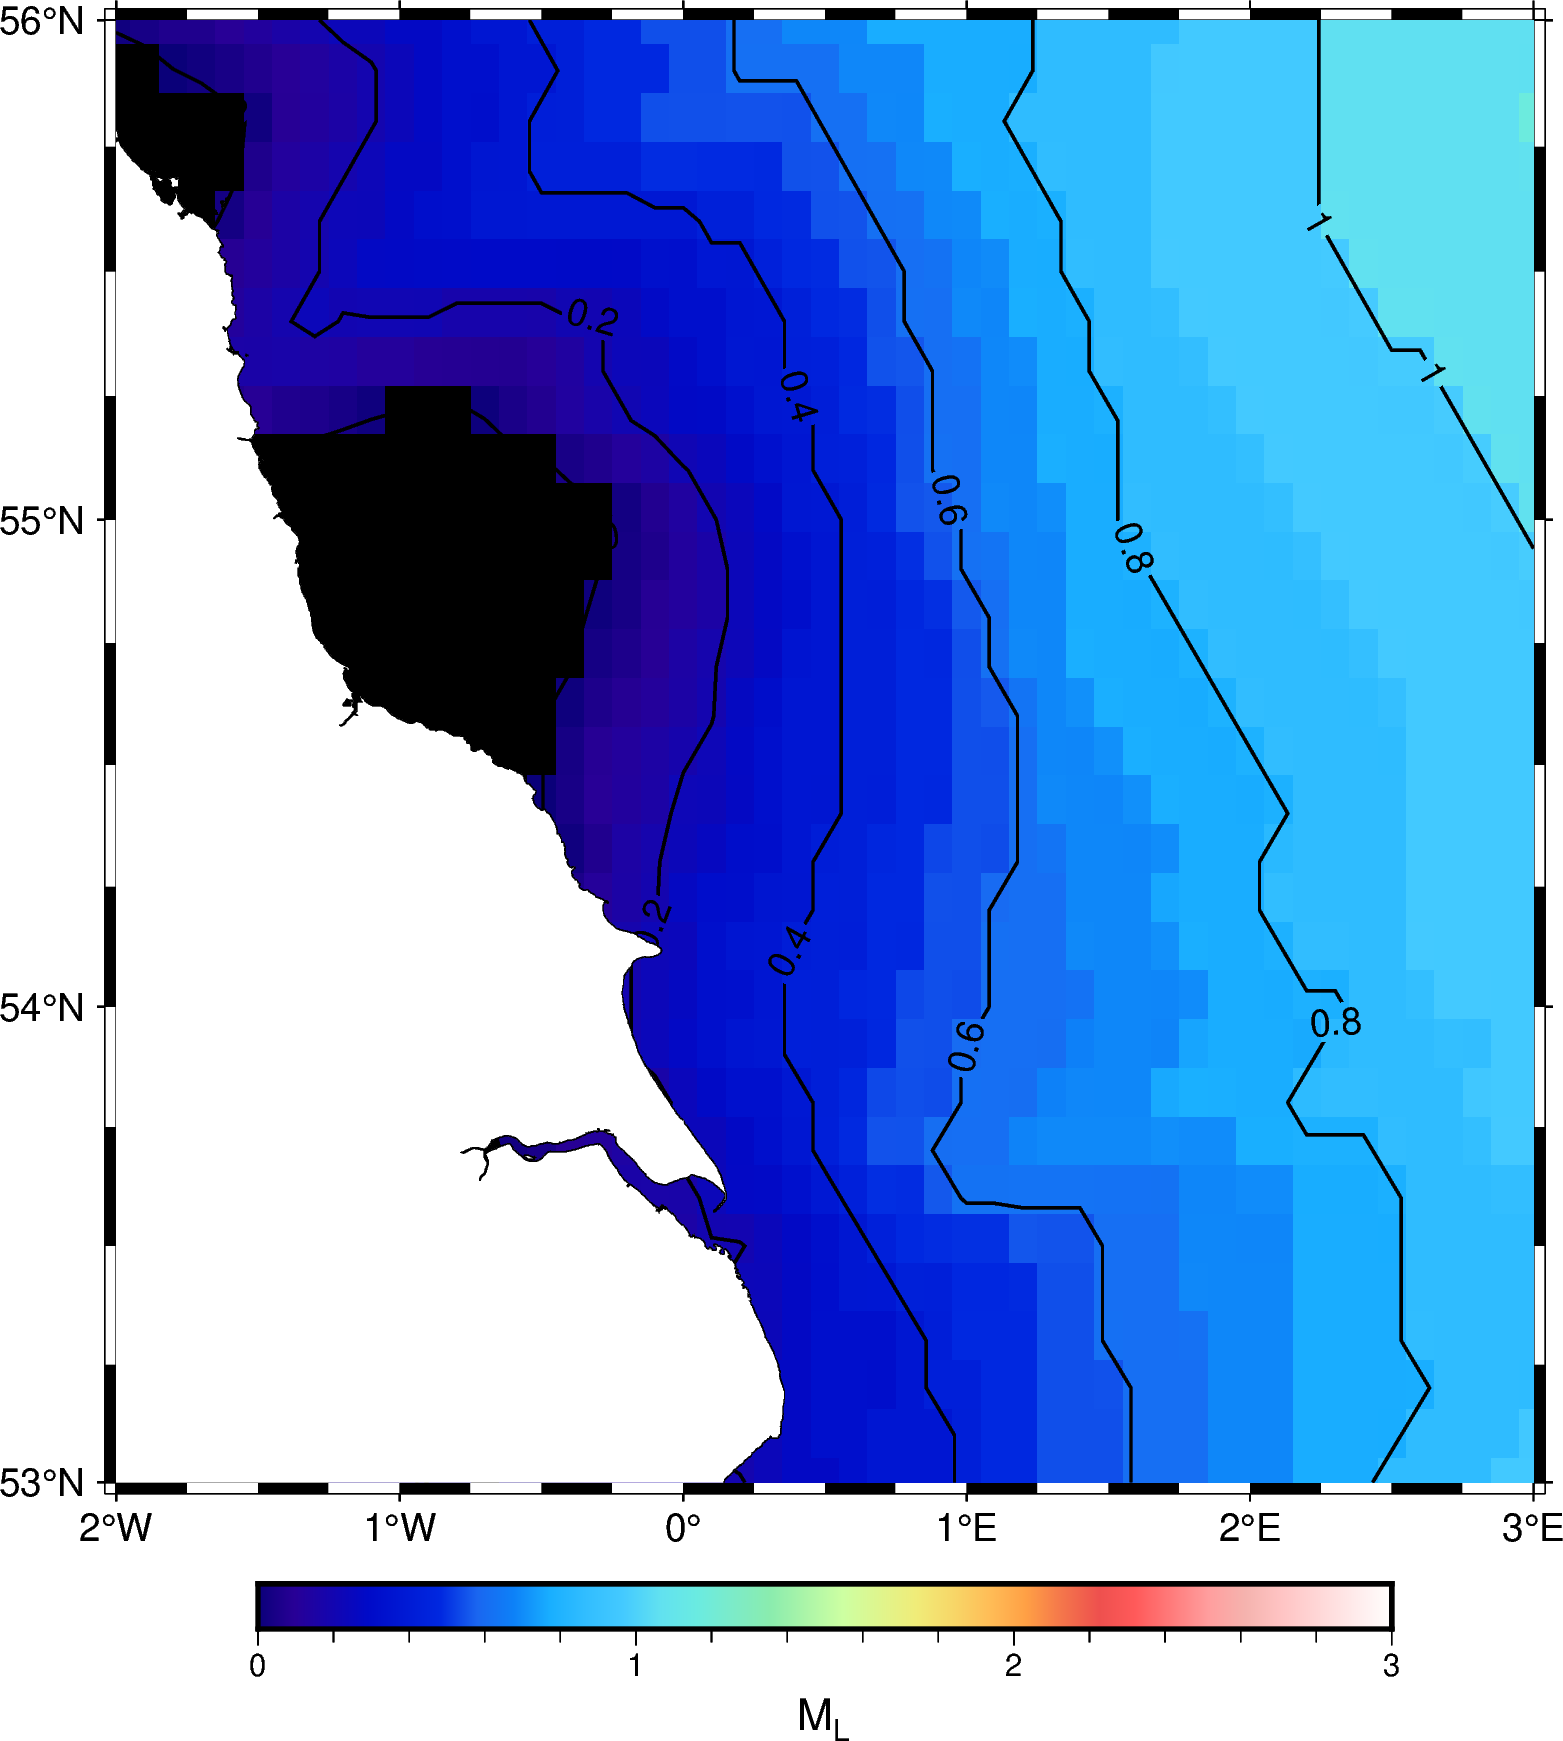

In [ ]:
region = [-2, 3, 53, 56]
figure1 = pygmt.Figure()
figure1.basemap(projection='M12c',region=region,
                frame=["af"])
pygmt.makecpt(cmap='haxby', series=[0,3])
figure1.grdimage(grid=akker_test, cmap=True)
figure1.grdcontour(grid=akker_test,
                  levels=0.2, annotation=0.2,  label_placement='n2')
figure1.colorbar(frame=['x+lM@-L@-'])
figure1.coast(shorelines=True, land='white', borders='1',rivers=0)

figure1.show()

In [ ]:
uk_core_noise

longitude  latitude  elevation_km  noise [cm/s] station
0    -1.62417  53.95817         0.233  2.151437e-06     HPK
1     1.25917  52.25033         0.054  1.175516e-05    BEDF
2    -2.88067  52.51833         0.429  4.052552e-07    HLM1
3    -1.72467  53.40150         0.353  2.484440e-06    LBWR
4    -1.93817  54.25333         0.411  3.313054e-06    CTON
5    -1.30767  52.73850         0.203  1.175516e-06     CWF
6    -0.26500  51.18800         0.081  1.318951e-05    BRDL
7    -3.80267  51.06633         0.230  1.000000e+01     HEX
8    -5.65267  57.33917         0.013  5.891536e-07     KPL
9    -3.10483  54.58867         0.281  4.170888e-07    KESW
10   -3.59750  56.81950         0.390  3.825855e-06    PITL
11   -1.83183  54.55250         0.156  3.825855e-06    WINS
12   -4.04383  56.42733         0.279  6.422861e-08    INVG
13   -2.17167  49.18783         0.039  1.245170e-06     JSA
14    0.33633  50.86733         0.026  9.337456e-06    HMNX
15   -4.49867  53.40050         0.025  1.000000e+01     WPS
16   -2.61417  55.91750         0.337  3.937572e-06     ESY
17   -2.48650  56.91267         0.208  4.170888e-06    DRUM
18   -1.17783  60.13600         0.098  1.000000e+01     LRW
19   -4.55950  57.10100         0.663  3.409797e-06    GVIE
20   -5.22767  50.18667         0.210  6.803440e-07    CCA1
21   -2.16250  51.77583         0.200  3.409797e-06    STRD
22   -4.39667  53.28933         0.058  1.000000e+01    WLF1
23   -4.48483  50.99434         0.086  4.547038e-07     HTL
24   -0.32600  53.45683         0.146  1.523100e-05     LMK
25   -5.19700  58.14700         0.058  4.957110e-07    LINV
26   -3.93100  50.43533         0.292  7.417005e-07     DYA
27   -0.80967  51.72183         0.212  6.063572e-06     SKP
28    0.98950  52.09333         0.074  1.437900e-06    ELMS
29   -6.96583  62.06850         0.000  5.404164e-06    SOFL
30   -4.56617  54.26050         0.188  4.957110e-07    IOMK
31   -5.39900  56.26000         0.137  3.409797e-07    LAWE
32   -4.48367  55.81150         0.199  1.613350e-06    PGB1
33   -2.99833  51.99733         0.219  4.816467e-07    MCH1
34   -2.55017  51.66050         0.006  1.000000e+01    OLDB
35   -4.33733  56.18867         0.279  3.937572e-07     EAB
36   -2.80417  51.83916         0.145  1.437900e-06    MONM
37   -3.25417  57.58283         0.293  7.417005e-07     MCD
38   -3.20517  55.31650         0.261  3.038985e-07     ESK
39   -1.80033  51.51317         0.192  3.611840e-06    SWN1
40   -1.96217  54.83117         0.000  1.109759e-06    EDMD
41    0.62833  52.72433         0.062  1.863067e-06    WACR
42   -4.74483  51.95284         0.278  2.631653e-06    RSBS
43    1.13483  51.14817         0.129  2.484440e-06    ELSH
44   -2.87250  57.16083         0.320  1.000000e+01    TARL
45   -4.23000  55.11733         0.151  1.708947e-06    NEWG
46   -4.71133  54.86633         0.117  3.717308e-07    GAL1
47   -2.20617  53.09133         0.234  1.000000e+01    STNC
48   -3.91017  58.49317         0.070  2.952763e-07    BIGH
49   -3.19983  52.88950         0.447  2.952763e-07    FOEL
50   -6.11050  55.08283         0.239  6.610412e-07    CLGH
51   -3.26683  54.31000         0.220  1.000000e+01    AP12
52   -2.45867  53.99600         0.233  1.000000e+01    AR07
53   -2.75183  54.43683         0.389  1.000000e+01    AQ12
54   -0.66133  54.12383         0.181  9.337456e-07    AU08
55   -3.18750  55.92333         0.125  3.509365e-06     EDI
56   -0.81567  54.42183         0.228  2.868987e-06    GDLE

testing for das noise levels

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('../tests/data/tampnet_das_month_noise.csv')

In [ ]:
# make fake noise to test stepping function
stepped_noise = np.zeros((4000,))
for i in range(4000):
    if i < 100:
        stepped_noise[i] = 1e-8
    elif i < 200:
        stepped_noise[i] = 2e-9
    elif i < 500:
        stepped_noise[i] = 1e-9
    elif i < 750:
        stepped_noise[i] = 5e-9
    elif i < 1000:
        stepped_noise[i] = 1e-9
    elif i < 1500:
        stepped_noise[i] = 2e-8
    elif i < 2000:
        stepped_noise[i] = 5e-8
    elif i < 2500:
        stepped_noise[i] = 1e-8
    elif i < 2800:
        stepped_noise[i] = 4e-8
    elif i < 3200: 
        stepped_noise[i] = 1e-9
    elif i < 3500:
        stepped_noise[i] = 5e-8
    elif i < 3800:
        stepped_noise[i] = 8e-8
    else:
        stepped_noise[i] = 1e-7

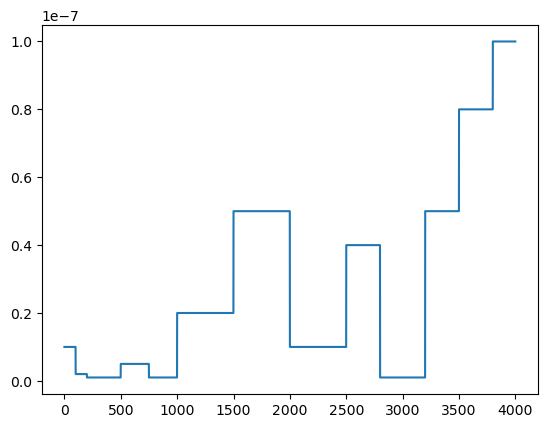

In [ ]:
plt.plot(stepped_noise)

In [ ]:
df.columns

Index(['channel_index', 'fiber_length_m', 'longitude', 'latitude', 'noise_m',
       'elevation_km'],
      dtype='object')

In [ ]:
from sncast.model_detection_capability import get_das_noise_levels

In [ ]:
def get_das_noise_levels(channel_pos, noise, detection_length, slide_length=1):
    """
    Gets the maximum seismic noise level (in displacement) along
    a given continuous fibre length.

    Parameters
    ----------
    channel_pos : np.ndarray
        position of channels along the fibre in metres.
    noise : float
        Noise level of the fibre in metres.
    detection_length : float
        Length of the fibre over which to calculate the noise level in metres.
    slide_length : float, optional
        Length to slide the detection window along the fibre in metres.
        Default is 1 metre.
    Returns
    -------
    np.ndarray
        Array of noise levels for each section of the fibre.
    """
    fibre_length = channel_pos[-1] - channel_pos[0]
    if detection_length > fibre_length:
        raise ValueError(
            f"detection_length {detection_length:4.2f} must be less "
            + f"than fibre_length {fibre_length:4.2f}"
        )
    if detection_length <= 0:
        raise ValueError(f"detection_length {detection_length} must be positive")

    start_length = channel_pos[0]
    # Calculate the number of sections along the fibre
    noise_at_sections = np.zeros(channel_pos.shape)
    print(channel_pos >= start_length + 1 * slide_length)
    for i in range(len(channel_pos)):
        idx = np.argwhere(
            (channel_pos >= start_length + i * slide_length)
            & (channel_pos < start_length + detection_length + i * slide_length)
        ).flatten()
        print(idx)
        noise_at_sections[i] = np.max(noise[idx])

    return noise_at_sections

In [ ]:
%%time
# from scipy.ndimage import maximum_filter1d

noise_wind = maximum_filter1d(stepped_noise, size=100)

CPU times: user 199 μs, sys: 81 μs, total: 280 μs
Wall time: 254 μs


In [ ]:
%%time 
# calculate root(n) noise reduction for 100 samples included edge cases where the widnow is smaller
# at the start and end of the array
# we need to use the original stepped noise for this
win_len_idx = 101  # or any integer (odd or even)
half_win = win_len_idx // 2
noise_rootn = np.ones(stepped_noise.shape) * np.sqrt(win_len_idx)

# For edge cases, calculate the correct window sizes
if win_len_idx % 2 == 0:
    # Even window: left and right edges have different lengths
    noise_start = np.sqrt(np.arange(half_win, win_len_idx))
    noise_end = np.sqrt(np.arange(win_len_idx, half_win, -1))
    noise_rootn[:half_win] = noise_start
    noise_rootn[-half_win:] = noise_end
else:
    # Odd window: symmetric
    noise_start = np.sqrt(np.arange(half_win+1, win_len_idx+1))
    noise_rootn[:half_win+1] = noise_start
    noise_rootn[-(half_win+1):] = noise_start[::-1]


CPU times: user 113 μs, sys: 26 μs, total: 139 μs
Wall time: 128 μs


In [ ]:
noise_start.shape

(51,)

In [ ]:
noise_rootn[-(half_win+1):].shape

(51,)

In [ ]:
noise_rootn[49]

10.0

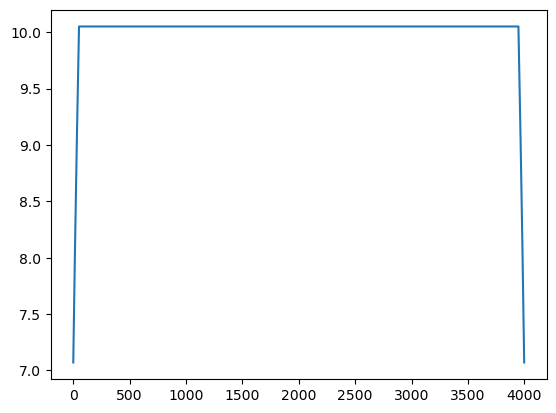

In [ ]:
plt.plot(noise_rootn)

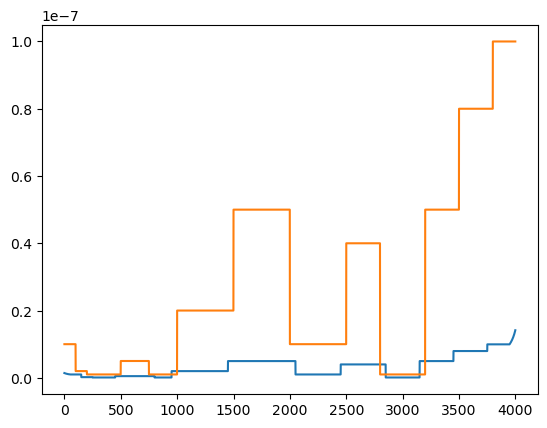

In [ ]:
plt.plot(noise_wind/noise_rootn)
plt.plot(stepped_noise)


In [130]:
from sncast.model_detection_capability import calc_min_ml_at_gridpoint_das, calc_local_magnitude
import pygc

In [135]:
dummy_fibre = pd.read_csv("../tests/data/das_dummy_data.csv")
lat = 50
lon = 0.5
distances_km = (
    pygc.great_distance(
        start_latitude=dummy_fibre["latitude"].values,
        end_latitude=lat,
        start_longitude=dummy_fibre["longitude"].values,
        end_longitude=lon,
    )["distance"]
    * 1e-3
)
result = calc_min_ml_at_gridpoint_das(
    dummy_fibre,
    100,
    lon,
    lat,
    foc_depth=0,
    snr=1,
    region="UK",
    method="ML",
    mag_min=-2,
    mag_delta=0.1,
    gauge_len=10,
)

In [136]:
distances_km

array([35.14481836, 35.19394563, 35.27809152, 35.39700649, 35.55034179,
       35.73765458, 35.95841405, 36.21200868, 36.49775421, 36.8149022 ])

In [143]:
from sncast.model_detection_capability import calc_ampl_from_magnitude

In [144]:
calc_ampl_from_magnitude(0.5, 35, 'UK')

6.471310733079663

In [146]:
calc_local_magnitude(6.0, 35, 'UK', 0, 0.1)

0.5